# Determining the Best US Airport to open a Restaurant

In [268]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

In [269]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States'
wiki_rawHTML = requests.get(wiki_url).text
wiki_content = BeautifulSoup(wiki_rawHTML, 'lxml')

In [458]:
airports_table = wiki_content.find_all('table', class_="wikitable sortable")[0]
airports_table_rows = airports_table.find_all('tr')

In [463]:
airports_dict = {}
keys = []
values = [[] for i in range(15)]

length = len(airports_table_rows)
for i in range(length):
    if (i == 0):
        headers = airports_table_rows[i].find_all('th')
        for header in headers:
            keys.append(header.text)
    else:
        cols = airports_table_rows[i].find_all('td')
        for i, colval in enumerate(cols):
            values[i].append(colval.text)

values
            
for i in range(len(keys)):
    airports_dict[keys[i]] = values[i]

0
1


IndexError: list index out of range

In [272]:
[i for i in range(0, 5)]

[0, 1, 2, 3, 4]

In [273]:
df = pd.DataFrame.from_dict(airports_dict)
df.drop(df.columns[[i for i in range(0, 3)] + [i for i in range(4, 8)] + [9, 13, 14]], inplace=True, axis=1)
df.head()

,2012[8],2017[3],Airports (large hubs),IATACode,Major city served
0,"45,798,809\n","50,251,962\n",Hartsfield–Jackson Atlanta International Airpo...,ATL\n,Atlanta\n
1,"31,326,268\n","41,232,416\n",Los Angeles International Airport\n,LAX\n,Los Angeles\n
2,"32,171,743\n","38,593,028\n",O'Hare International Airport\n,ORD\n,Chicago\n
3,"28,022,877\n","31,861,933\n",Dallas/Fort Worth International Airport\n,DFW\n,Dallas/Fort Worth\n
4,"25,799,832\n","29,809,091\n",Denver International Airport\n,DEN\n,Denver\n


In [274]:
df.columns = ['2012', '2017', 'Name', 'IATA', 'City']
df = df.reindex(columns=['Name', 'City', 'IATA', '2012', '2017'])
df=df.replace('\n','', regex=True)
df['2012'] = df['2012'].replace(',', '', regex=True).astype(int)
df['2017'] = df['2017'].replace(',', '', regex=True).astype(int)
df.reset_index(inplace=True, drop=True)
df = df.replace('Gen. Edward Lawrence ', '', regex=True)
df

,Name,City,IATA,2012,2017
0,Hartsfield–Jackson Atlanta International Airport,Atlanta,ATL,45798809,50251962
1,Los Angeles International Airport,Los Angeles,LAX,31326268,41232416
2,O'Hare International Airport,Chicago,ORD,32171743,38593028
3,Dallas/Fort Worth International Airport,Dallas/Fort Worth,DFW,28022877,31861933
4,Denver International Airport,Denver,DEN,25799832,29809091
5,John F. Kennedy International Airport,New York,JFK,24520943,29533154
6,San Francisco International Airport,San Francisco,SFO,21284224,26900016
7,McCarran International Airport,Las Vegas,LAS,19941173,23364185
8,Seattle–Tacoma International Airport,Seattle/Tacoma,SEA,16625787,22639120
9,Charlotte Douglas International Airport,Charlotte,CLT,20032426,22011225


In [275]:
df.shape

(30, 5)

In [276]:
import geocoder

In [282]:
def find_lat(loc):
    print(loc)
    try:
        return geocoder.osm(loc).osm['y']
    except:
        return 'Not Found'
    
def find_long(loc):
    print(loc)
    try:
        return geocoder.osm(loc).osm['x']
    except:
        return 'Not Found'



In [284]:
df['Latitude'] = df['Name'].apply(lambda x: find_lat(x))
df['Longitude'] = df['Name'].apply(lambda x: find_long(x))

Hartsfield–Jackson Atlanta International Airport
Los Angeles International Airport
O'Hare International Airport
Dallas/Fort Worth International Airport
Denver International Airport
John F. Kennedy International Airport
San Francisco International Airport
McCarran International Airport
Seattle–Tacoma International Airport
Charlotte Douglas International Airport
Newark Liberty International Airport
Orlando International Airport
Phoenix Sky Harbor International Airport
Miami International Airport
George Bush Intercontinental Airport
Logan International Airport
Minneapolis–Saint Paul International Airport
Detroit Metropolitan Airport
Fort Lauderdale–Hollywood International Airport
Philadelphia International Airport
LaGuardia Airport
Baltimore–Washington International Airport
Salt Lake City International Airport
Ronald Reagan Washington National Airport
Washington Dulles International Airport
San Diego International Airport
Midway International Airport
Tampa International Airport
Daniel K. 

In [289]:
df = df[df['Latitude'] != 'Not Found']
df

,Name,City,IATA,2012,2017,Latitude,Longitude
0,Hartsfield–Jackson Atlanta International Airport,Atlanta,ATL,45798809,50251962,33.6378,-84.4293
1,Los Angeles International Airport,Los Angeles,LAX,31326268,41232416,33.9422,-118.421
2,O'Hare International Airport,Chicago,ORD,32171743,38593028,41.978,-87.9093
3,Dallas/Fort Worth International Airport,Dallas/Fort Worth,DFW,28022877,31861933,32.8965,-97.0465
4,Denver International Airport,Denver,DEN,25799832,29809091,39.8502,-104.675
5,John F. Kennedy International Airport,New York,JFK,24520943,29533154,40.6429,-73.7794
6,San Francisco International Airport,San Francisco,SFO,21284224,26900016,37.6225,-122.384
7,McCarran International Airport,Las Vegas,LAS,19941173,23364185,36.0861,-115.161
8,Seattle–Tacoma International Airport,Seattle/Tacoma,SEA,16625787,22639120,47.4476,-122.308
9,Charlotte Douglas International Airport,Charlotte,CLT,20032426,22011225,35.2107,-80.9457


In [304]:
def growthrate(row):
    return round(((row['2017'] - row['2012']) / row['2012']) * 100, 2)


df['Growth'] = df.apply(lambda row: growthrate(row), axis=1)
df = df[df['Growth'] > 10]
df.head()

C:\Users\allen_xk\Documents\New folder (2)\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Name,City,IATA,2012,2017,Latitude,Longitude,Growth
1,Los Angeles International Airport,Los Angeles,LAX,31326268,41232416,33.9422,-118.421,31.62
2,O'Hare International Airport,Chicago,ORD,32171743,38593028,41.978,-87.9093,19.96
3,Dallas/Fort Worth International Airport,Dallas/Fort Worth,DFW,28022877,31861933,32.8965,-97.0465,13.70
4,Denver International Airport,Denver,DEN,25799832,29809091,39.8502,-104.675,15.54
5,John F. Kennedy International Airport,New York,JFK,24520943,29533154,40.6429,-73.7794,20.44


In [305]:
## Make a map of all airport locations
import folium
map_clusters = folium.Map(location=[37, -93], zoom_start=4)


for lat, long in zip(df['Latitude'], df['Longitude']):
    folium.CircleMarker(
    [lat, long],
    radius=5).add_to(map_clusters)

map_clusters

In [307]:
df.shape

(22, 8)

In [433]:
CLIENT_ID = 'N0M3U3CG1U2U4TLPUWXXQ101ITC4Y3VRNXWLHYWBP21M0UPC'
CLIENT_SECRET = '4HFZ2AIBI1VN4AFP1HKGZ0YC4AMEARDKSZ0FXCTNXZ1TVHMS'
categoryid ='4bf58dd8d48988d103951735'

VERSION = 20180602

LIMIT= 200

In [517]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            categoryid,
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        for v in range(len(results)):
            venue = results[v]
            venues_list.append([(
                name,
                lat,
                lng,
                venue['name'],
                venue['location']['lat'], 
                venue['location']['lng'],  
                venue['categories'][0]['name']) 
            ])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [518]:
airport_venues = getNearbyVenues(df['Name'], df['Latitude'], df['Longitude'])
airport_venues.head()

Los Angeles International Airport
O'Hare International Airport
Dallas/Fort Worth International Airport
Denver International Airport
John F. Kennedy International Airport
San Francisco International Airport
McCarran International Airport
Seattle–Tacoma International Airport
Newark Liberty International Airport
Orlando International Airport
Logan International Airport
Minneapolis–Saint Paul International Airport
Detroit Metropolitan Airport
Fort Lauderdale–Hollywood International Airport
LaGuardia Airport
Baltimore–Washington International Airport
Salt Lake City International Airport
Ronald Reagan Washington National Airport
San Diego International Airport
Midway International Airport
Tampa International Airport
Portland International Airport


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Los Angeles International Airport,33.942168,-118.421376,Gucci,33.943150,-118.410340,Boutique
1,Los Angeles International Airport,33.942168,-118.421376,Salvatore Ferragamo,33.943449,-118.409170,Shoe Store
2,Los Angeles International Airport,33.942168,-118.421376,Fred Segal,33.942870,-118.410305,Boutique
3,Los Angeles International Airport,33.942168,-118.421376,Hugo Boss,33.942884,-118.410346,Men's Store
4,Los Angeles International Airport,33.942168,-118.421376,Emperio Armani,33.943867,-118.410063,Clothing Store


In [519]:
airport_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Los Angeles International Airport,33.942168,-118.421376,Gucci,33.943150,-118.410340,Boutique
1,Los Angeles International Airport,33.942168,-118.421376,Salvatore Ferragamo,33.943449,-118.409170,Shoe Store
2,Los Angeles International Airport,33.942168,-118.421376,Fred Segal,33.942870,-118.410305,Boutique
3,Los Angeles International Airport,33.942168,-118.421376,Hugo Boss,33.942884,-118.410346,Men's Store
4,Los Angeles International Airport,33.942168,-118.421376,Emperio Armani,33.943867,-118.410063,Clothing Store
5,Los Angeles International Airport,33.942168,-118.421376,Michael Kors,33.943220,-118.410312,Boutique
6,Los Angeles International Airport,33.942168,-118.421376,Burberry,33.942791,-118.410237,Accessories Store
7,Los Angeles International Airport,33.942168,-118.421376,Marvin's Complimentary Shoe Shines,33.941803,-118.405953,Shoe Store
8,Los Angeles International Airport,33.942168,-118.421376,Gucci - TBIT,33.942826,-118.405690,Boutique
9,Los Angeles International Airport,33.942168,-118.421376,Victoria's Secret,33.943277,-118.410691,Lingerie Store


In [520]:
df12 = airport_venues.groupby('Venue Category').count()[['Neighborhood']].sort_values(by='Neighborhood', ascending=False).head(10)

df12['Venue Category'] = df12.index
df12.rename(columns={'Neighborhood': 'Count'}, inplace=True)
df12 = df12[['Venue Category', 'Count']]
df12.index = range(0, 10)
df12


,Venue Category,Count
0,Clothing Store,148
1,Boutique,81
2,Accessories Store,76
3,Shoe Store,54
4,Women's Store,44
5,Men's Store,33
6,Lingerie Store,11
7,Department Store,9
8,Gift Shop,7
9,Sporting Goods Shop,6


In [521]:

index = np.arange(len(df12['Venue Category']))
df12['Venue Category']

0         Clothing Store
1               Boutique
2      Accessories Store
3             Shoe Store
4          Women's Store
5            Men's Store
6         Lingerie Store
7       Department Store
8              Gift Shop
9    Sporting Goods Shop
Name: Venue Category, dtype: object

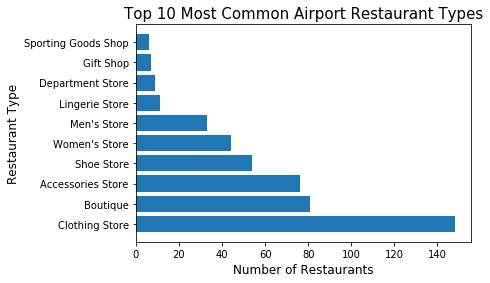

In [522]:
import matplotlib.pyplot as plt
index = np.arange(len(df12['Venue Category']))
plt.barh(index, df12['Count'])
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Restaurant Type', fontsize=12)
plt.yticks(index, df12['Venue Category'], fontsize=10)
plt.title('Top 10 Most Common Airport Restaurant Types', fontsize=15)
plt.show()

In [523]:
## Now we can take the 10 most common food venue types
airport_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Los Angeles International Airport,33.942168,-118.421376,Gucci,33.943150,-118.410340,Boutique
1,Los Angeles International Airport,33.942168,-118.421376,Salvatore Ferragamo,33.943449,-118.409170,Shoe Store
2,Los Angeles International Airport,33.942168,-118.421376,Fred Segal,33.942870,-118.410305,Boutique
3,Los Angeles International Airport,33.942168,-118.421376,Hugo Boss,33.942884,-118.410346,Men's Store
4,Los Angeles International Airport,33.942168,-118.421376,Emperio Armani,33.943867,-118.410063,Clothing Store
5,Los Angeles International Airport,33.942168,-118.421376,Michael Kors,33.943220,-118.410312,Boutique
6,Los Angeles International Airport,33.942168,-118.421376,Burberry,33.942791,-118.410237,Accessories Store
7,Los Angeles International Airport,33.942168,-118.421376,Marvin's Complimentary Shoe Shines,33.941803,-118.405953,Shoe Store
8,Los Angeles International Airport,33.942168,-118.421376,Gucci - TBIT,33.942826,-118.405690,Boutique
9,Los Angeles International Airport,33.942168,-118.421376,Victoria's Secret,33.943277,-118.410691,Lingerie Store


In [524]:
ratio = airport_venues.groupby('Neighborhood').count()
ratio.drop(ratio.columns[[1,2,3,4,5]], axis=1, inplace=True)
ratio.columns =['Restaurant Count']
ratio.index.names=['Airport']

ratio

,Restaurant Count
Airport,
Baltimore–Washington International Airport,10
Dallas/Fort Worth International Airport,31
Denver International Airport,16
Detroit Metropolitan Airport,15
Fort Lauderdale–Hollywood International Airport,13
John F. Kennedy International Airport,35
LaGuardia Airport,22
Logan International Airport,12
Los Angeles International Airport,28


In [525]:
df_final = pd.merge(ratio, df, left_index=True, right_on='Name')
df_final['Ratio'] = round(df_final['2017']/df_final['Restaurant Count'])
df_final = df_final[['Name', 'City', 'Growth', 'Ratio']]
df_final = df_final.reset_index(drop=True)
df_final

,Name,City,Growth,Ratio
0,Baltimore–Washington International Airport,"Baltimore/Washington, D.C.",18.15,1321418.0
1,Dallas/Fort Worth International Airport,Dallas/Fort Worth,13.70,1027804.0
2,Denver International Airport,Denver,15.54,1863068.0
3,Detroit Metropolitan Airport,Detroit,11.06,1155040.0
4,Fort Lauderdale–Hollywood International Airport,Fort Lauderdale,41.69,1247437.0
5,John F. Kennedy International Airport,New York,20.44,843804.0
6,LaGuardia Airport,New York,14.97,669902.0
7,Logan International Airport,Boston,33.94,1595425.0
8,Los Angeles International Airport,Los Angeles,31.62,1472586.0
9,McCarran International Airport,Las Vegas,17.17,486754.0


In [534]:
## Now get income for each of th
df_final['City'] = df_final['City'].apply(lambda x: x.split('/')[0])
df_final = df_final.replace(', D.C.', '', regex=True)
df_final

,Name,City,Growth,Ratio
0,Baltimore–Washington International Airport,Baltimore,18.15,1321418.0
1,Dallas/Fort Worth International Airport,Dallas,13.70,1027804.0
2,Denver International Airport,Denver,15.54,1863068.0
3,Detroit Metropolitan Airport,Detroit,11.06,1155040.0
4,Fort Lauderdale–Hollywood International Airport,Fort Lauderdale,41.69,1247437.0
5,John F. Kennedy International Airport,New York,20.44,843804.0
6,LaGuardia Airport,New York,14.97,669902.0
7,Logan International Airport,Boston,33.94,1595425.0
8,Los Angeles International Airport,Los Angeles,31.62,1472586.0
9,McCarran International Airport,Las Vegas,17.17,486754.0


In [535]:
## Get the income data from wikipedia
income_url = 'https://en.wikipedia.org/wiki/List_of_United_States_metropolitan_areas_by_per_capita_income'
income_rawHTML = requests.get(income_url).text
income_content = BeautifulSoup(income_rawHTML, 'lxml')

income_table = income_content.find('table', class_="toccolours sortable")
income_table_rows = income_table.find_all('tr')

In [536]:
income_dict = {}
i_keys = []
i_values = [[] for i in range(15)]

length = len(income_table_rows)
for i in range(length):
    if (i == 0):
        headers = income_table_rows[i].find_all('th')
        for header in headers:
            i_keys.append(header.text)
    else:
        cols = income_table_rows[i].find_all('td')
        for i, colval in enumerate(cols):
            i_values[i].append(colval.text)

values
            
for i in range(len(i_keys)):
    income_dict[i_keys[i]] = i_values[i]

In [537]:
df_income = pd.DataFrame.from_dict(income_dict)
df_income.drop(df_income.columns[[2, 3]], axis=1, inplace=True)
df_income.columns = ['Metro', 'Income']
df_income = df_income.replace(['\$', ',', '\n'], '', regex=True)
df_income['Metro'] = df_income['Metro'].apply(lambda x: x.split('–')[0])
df_income['Metro'] = df_income['Metro'].apply(lambda x: x.split('-')[0])
df_income

,Metro,Income
0,Washington,47411
1,San Jose,40392
2,Seattle,39322
3,San Francisco,38355
4,Boston,37311
5,Honolulu Hawaii MSA,36339
6,Minneapolis,35388
7,Hartford Connecticut MSA,34310
8,Denver,32399
9,Portland,31377


In [538]:
## Join dataframes on the metropolitan area name

In [545]:
df_total = pd.merge(left=df_final, right=df_income, how='left', left_on='City', right_on='Metro')
df_total

,Name,City,Growth,Ratio,Metro,Income
0,Baltimore–Washington International Airport,Baltimore,18.15,1321418.0,Baltimore,29771
1,Dallas/Fort Worth International Airport,Dallas,13.70,1027804.0,Dallas,23616
2,Denver International Airport,Denver,15.54,1863068.0,Denver,32399
3,Detroit Metropolitan Airport,Detroit,11.06,1155040.0,Detroit,22319
4,Fort Lauderdale–Hollywood International Airport,Fort Lauderdale,41.69,1247437.0,NaN,NaN
5,John F. Kennedy International Airport,New York,20.44,843804.0,New York,24581
6,LaGuardia Airport,New York,14.97,669902.0,New York,24581
7,Logan International Airport,Boston,33.94,1595425.0,Boston,37311
8,Los Angeles International Airport,Los Angeles,31.62,1472586.0,Los Angeles,21170
9,McCarran International Airport,Las Vegas,17.17,486754.0,NaN,NaN


In [550]:
df_income['Metro'].apply(lambda x: )
#pd.concat([df_final.column_a, rhs], axis=1, ignore_index=True)

,0,2,3,4,6,8,9,12,18,21,...,83,85,120,122,146,150,155,189,242,263
0,Baltimore,Baltimore,Baltimore,Baltimore,Baltimore,Baltimore,Baltimore,Baltimore,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dallas,Dallas,Dallas,Dallas,Dallas,Dallas,Dallas,Dallas,Dallas,Dallas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denver,Denver,Denver,Denver,Denver,Denver,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,Detroit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,New York,New York,New York,New York,New York,New York,New York,New York,New York,Rochester New York MSA,...,Syracuse New York MSA,Syracuse New York MSA,Syracuse New York MSA,Syracuse New York MSA,Glens Falls New York MSA,Binghamton New York MSA,Binghamton New York MSA,Elmira New York MSA,Jamestown New York MSA,NaN
6,New York,New York,New York,New York,New York,New York,New York,New York,New York,Rochester New York MSA,...,Syracuse New York MSA,Syracuse New York MSA,Syracuse New York MSA,Syracuse New York MSA,Glens Falls New York MSA,Binghamton New York MSA,Binghamton New York MSA,Elmira New York MSA,Jamestown New York MSA,NaN
7,Boston,Boston,Boston,Boston,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles,...,Los Angeles,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Las Vegas Nevada,Las Vegas Nevada,Las Vegas Nevada,Las Vegas Nevada,Las Vegas Nevada,Las Vegas Nevada,Las Vegas Nevada,Las Vegas Nevada,Las Vegas Nevada,Las Vegas Nevada,...,Las Vegas Nevada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
